In [67]:
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# single stick sticking down

In [80]:
x0 = form_obs([9,12,13,16,20])
xf = form_obs([9,12,13,16])
x0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0.])

In [81]:
task = Task(init_obs=x0,nsquares=1,nmoves=1)
task.head_node.obs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0.])

In [85]:
treeSearch(task,BFS=False)

2

In [9]:
from collections import deque
deq = deque()
deq.append(0)
deq.extend([1,2,3])
deq.popleft()
deq

deque([1, 2, 3])

In [12]:
def eval_nsteps(play_fn,task,nitr):
  nsteps = np.zeros(nitr)
  for itr in np.arange(nitr):
    nsteps[itr] = play_fn(task)
  return nsteps


Text(0, 0.5, 'solution time')

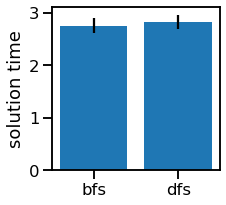

In [25]:
nitr = 100
bfs_steps = eval_nsteps(BFSplay,task,nitr)
dfs_steps = eval_nsteps(BFSplay,task,nitr)

## plt
xplt = ['bfs','dfs']
yplt = [bfs_steps.mean(),
        dfs_steps.mean()
       ]
yerplt = [bfs_steps.std()/np.sqrt(nitr),
          dfs_steps.std()/np.sqrt(nitr)
         ]

f,axar = plt.subplots(1,1,figsize=(3,3))
ax =axar
ax.bar(xplt,yplt,yerr=yerplt)
ax.set_ylabel('solution time')

In [28]:
import queue
q1 = queue.Queue()
q1.put(10)
q1.

In [44]:
COUNT_SQUARE_IDX = [
    [1,4,5,8], # ones in first row
    [2,5,6,9], # ones in second row
    [3,6,7,10],
    [8,11,12,15],
    [9,12,13,16],
    [10,13,14,17],
    [15,18,19,22],
    [16,19,20,23],
    [17,20,21,24]
]

COUNT_SQUARE_MATRIX = np.zeros([9,24])
for idx_row,idx_col in enumerate(COUNT_SQUARE_IDX):
  M[idx_row,np.array(idx_col)-1] = 1

0
1
2
3
4
5
6
7
8


array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 